In [ ]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from pandas import melt
from pylab import rcParams
from sklearn import preprocessing
from IPython.display import Image
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('MPS Borough Level Crime (most recent 24 months).csv')
df.head()

MajorText                          MinorText  \
0  Arson and Criminal Damage                              Arson   
1  Arson and Criminal Damage                    Criminal Damage   
2                   Burglary  Burglary - Business and Community   
3                   Burglary             Burglary - Residential   
4              Drug Offences                   Drug Trafficking   

     LookUp_BoroughName  201803  201804  201805  201806  201807  201808  \
0  Barking and Dagenham       6       3       4      12       6       5   
1  Barking and Dagenham     115     122     126     123     127     101   
2  Barking and Dagenham      38      36      24      33      30      18   
3  Barking and Dagenham     122      75      93      77      94      84   
4  Barking and Dagenham       7       3       8       6       9       7   

   201809  ...  201905  201906  201907  201908  201909  201910  201911  \
0       3  ...      11       3       5       3       6       9       8   
1     107  ...     138     113     134     118     109     109      99   
2      33  ...      22      27      31      35      37      30      30   
3      99  ...     114      96      71      67      80      97     114   
4      10  ...       8       6       8       6       6       9      10   

   201912  202001  202002  
0       6       4       4  
1     121      99      98  
2      25      31      17  
3     130     116     121  
4       2      12       3  

[5 rows x 27 columns]

In [3]:
#Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MajorText           1575 non-null   object
 1   MinorText           1575 non-null   object
 2   LookUp_BoroughName  1575 non-null   object
 3   201803              1575 non-null   int64 
 4   201804              1575 non-null   int64 
 5   201805              1575 non-null   int64 
 6   201806              1575 non-null   int64 
 7   201807              1575 non-null   int64 
 8   201808              1575 non-null   int64 
 9   201809              1575 non-null   int64 
 10  201810              1575 non-null   int64 
 11  201811              1575 non-null   int64 
 12  201812              1575 non-null   int64 
 13  201901              1575 non-null   int64 
 14  201902              1575 non-null   int64 
 15  201903              1575 non-null   int64 
 16  201904              1575

In [4]:
#Type of Crimes
print(df.MajorText.unique())

['Arson and Criminal Damage' 'Burglary' 'Drug Offences'
 'Miscellaneous Crimes Against Society' 'Possession of Weapons'
 'Public Order Offences' 'Robbery' 'Sexual Offences' 'Theft'
 'Vehicle Offences' 'Violence Against the Person']


In [5]:
#Type of subcrimes
print(df.MinorText.unique())

['Arson' 'Criminal Damage' 'Burglary - Business and Community'
 'Burglary - Residential' 'Drug Trafficking' 'Possession of Drugs'
 'Bail Offences' 'Bigamy' 'Dangerous Driving'
 'Disclosure, Obstruction, False or Misleading State'
 'Exploitation of Prostitution' 'Forgery or Use of Drug Prescription'
 'Fraud or Forgery Associated with Driver Records'
 'Going Equipped for Stealing' 'Handling Stolen Goods'
 'Making, Supplying or Possessing Articles for use i'
 'Obscene Publications' 'Other Forgery' 'Other Notifiable Offences'
 'Perjury' 'Perverting Course of Justice' 'Possession of False Documents'
 'Profitting From or Concealing Proceeds of Crime'
 'Threat or Possession With Intent to Commit Crimina' 'Wildlife Crime'
 'Other Firearm Offences' 'Possession of Article with Blade or Point'
 'Possession of Firearm with Intent' 'Possession of Firearms Offences'
 'Possession of Other Weapon'
 'Other Offences Against the State, or Public Order'
 'Public Fear Alarm or Distress'
 'Racially or Relig

In [29]:
# nameList = ['Soliciting for Prostitution','Offender Management Act','Exploitation of Prostitution', 
#             'Shoplifting','Profitting From or Concealing Proceeds of Crime','Possession of False Documents',
#             'Perverting Course of Justice','Perjury', 'Other Notifiable Offences', 'Other Forgery',
#             'Obscene Publications', 'Making, Supplying or Possessing Articles for use i','Handling Stolen Goods', 
#             'Fraud or Forgery Associated with Driver Records', 'Forgery or Use of Drug Prescription',
#             'Disclosure, Obstruction, False or Misleading State', 'Bigamy','Drug Trafficking', 'Bail Offences']

# newdf = df.loc[~df.MinorText.isin(nameList)]

In [6]:
#We drop minorText as we do not consider subcrimes for this study 
drop_col = ['MinorText']
df.drop(labels = drop_col, axis='columns', inplace=True)

# Time-Series Analysis

In [7]:
time_series_df = df.copy()

In [8]:
#transpose dataframe
time_series_df = time_series_df.melt(id_vars =['LookUp_BoroughName','MajorText'],var_name = 'Month')
time_series_df.head()

LookUp_BoroughName                  MajorText   Month  value
0  Barking and Dagenham  Arson and Criminal Damage  201803      6
1  Barking and Dagenham  Arson and Criminal Damage  201803    115
2  Barking and Dagenham                   Burglary  201803     38
3  Barking and Dagenham                   Burglary  201803    122
4  Barking and Dagenham              Drug Offences  201803      7

In [12]:
time_series_df

LookUp_BoroughName                    MajorText   Month  value
0      Barking and Dagenham    Arson and Criminal Damage  201803      6
1      Barking and Dagenham    Arson and Criminal Damage  201803    115
2      Barking and Dagenham                     Burglary  201803     38
3      Barking and Dagenham                     Burglary  201803    122
4      Barking and Dagenham                Drug Offences  201803      7
...                     ...                          ...     ...    ...
37795           Westminster             Vehicle Offences  202002    320
37796           Westminster             Vehicle Offences  202002     56
37797           Westminster  Violence Against the Person  202002      0
37798           Westminster  Violence Against the Person  202002    273
37799           Westminster  Violence Against the Person  202002    575

[37800 rows x 4 columns]

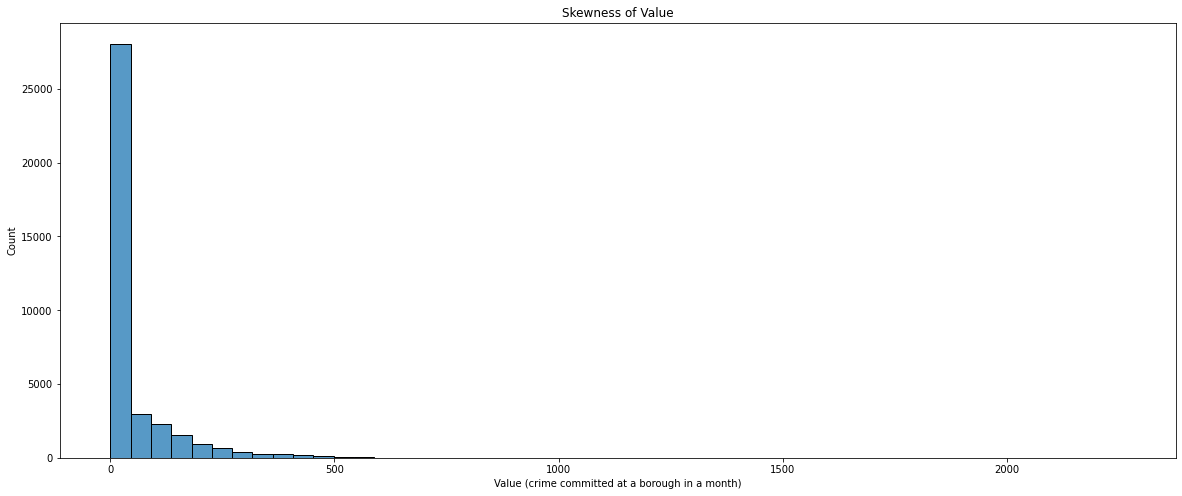

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(data=time_series_df, x="value", bins=50)
plt.title("Skewness of Value")
plt.xlabel('Value (crime committed at a borough in a month)')
plt.show()

In [14]:
#sperate month and year
time_series_df['Month'] = time_series_df['Month'].str[:4] + '-' + time_series_df['Month'].str[4:]
#convert the time to datetime to get date
time_series_df.Month = pd.to_datetime(time_series_df.Month)

In [15]:
time_series_df.head()

LookUp_BoroughName                  MajorText      Month  value
0  Barking and Dagenham  Arson and Criminal Damage 2018-03-01      6
1  Barking and Dagenham  Arson and Criminal Damage 2018-03-01    115
2  Barking and Dagenham                   Burglary 2018-03-01     38
3  Barking and Dagenham                   Burglary 2018-03-01    122
4  Barking and Dagenham              Drug Offences 2018-03-01      7

## Crime evolution by crime type

Text(0, 0.5, 'Crime count')

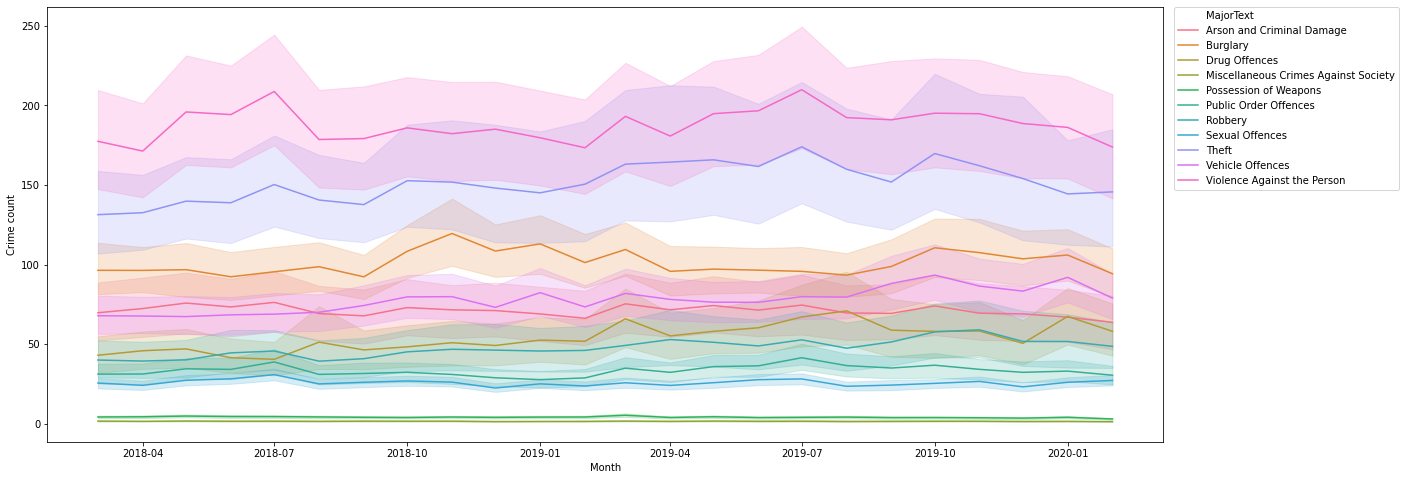

In [29]:
plt.figure(figsize=(20,8))
sns.lineplot(time_series_df['Month' ],time_series_df['value'], time_series_df['MajorText'])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.ylabel('Crime count')

In [42]:
crime_count = time_series_df.groupby(['Month'], as_index=False).agg('sum')
crime_count.head()

Month  value
0 2018-03-01  67217
1 2018-04-01  66930
2 2018-05-01  71429
3 2018-06-01  70633
4 2018-07-01  74796

In [44]:
index_crime_count = crime_count.set_index('Month')

## Additive timeseries

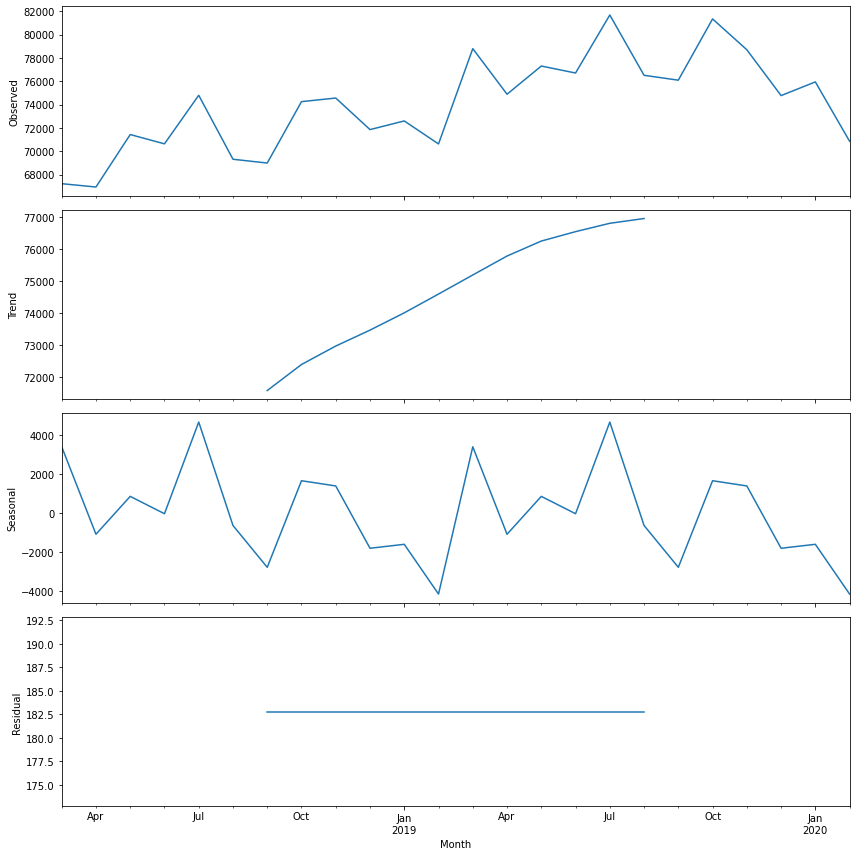

In [52]:
#additive time series
rcParams['figure.figsize'] = 12, 12
decomposition = sm.tsa.seasonal_decompose(index_crime_count, model='additive')
fig = decomposition.plot()
plt.show()

# Correlation Matrix

Created to identify what type of crime contributed to towards the temporal variation of crime.

In [70]:
corr_df = df.copy()

In [71]:
corr_df = corr_df.melt(id_vars =['LookUp_BoroughName', 'MajorText'],var_name = 'YearMonth')
#seperate month
corr_df['Month'] = corr_df['YearMonth'].str[4:]
#group by month and type of crime
corr_df = corr_df.groupby(['MajorText', 'Month'], as_index=False).agg('sum')

In [72]:
corr_df.head()

MajorText Month  value
0  Arson and Criminal Damage    01   8973
1  Arson and Criminal Damage    02   8575
2  Arson and Criminal Damage    03   9573
3  Arson and Criminal Damage    04   9501
4  Arson and Criminal Damage    05   9905

Data Normalization usin min max scaler

In [73]:
#normalization
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(corr_df[['value']])
col_names= ['normz']
df_mm = pd.DataFrame(df_mm, columns=col_names)

In [74]:
df_mm.head()

normz
0  0.188859
1  0.179316
2  0.203247
3  0.201520
4  0.211208

In [75]:
#merge data frames
corr_df = pd.merge(corr_df,df_mm,left_index=True, right_index=True)
corr_df.head()

MajorText Month  value     normz
0  Arson and Criminal Damage    01   8973  0.188859
1  Arson and Criminal Damage    02   8575  0.179316
2  Arson and Criminal Damage    03   9573  0.203247
3  Arson and Criminal Damage    04   9501  0.201520
4  Arson and Criminal Damage    05   9905  0.211208

[Text(159.0, 0.5, 'Type of Crime')]

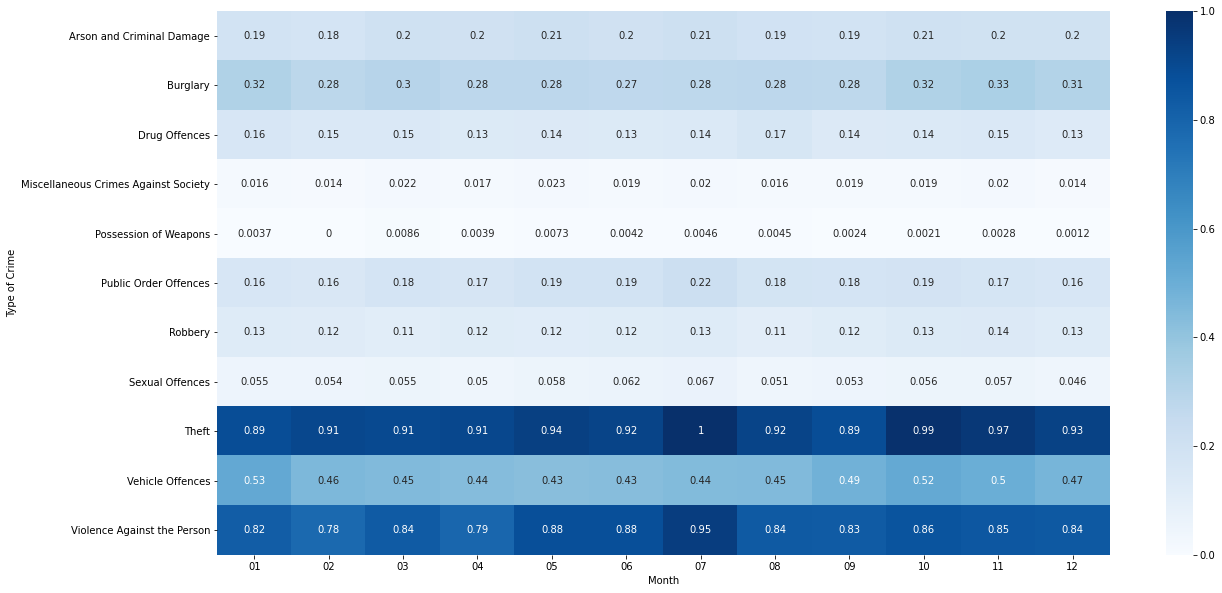

In [77]:
plt.figure(figsize = (20,10))
df3 = corr_df.pivot_table(index='MajorText', columns='Month',  values='normz')
ax = sns.heatmap(df3,cmap="Blues",annot=True)
ax.set(ylabel='Type of Crime')

# Census data

Combined census data to get details of youth population per borough. 

In [110]:
crime_df = df.copy()

In [111]:
#data processing
crime_df = crime_df.melt(id_vars =['LookUp_BoroughName', 'MajorText'],var_name = 'YearMonth')
crime_df['Month'] = crime_df['YearMonth'].str[4:]
crime_df['YearMonth'] = crime_df['YearMonth'].str[:4] + '-' + crime_df['YearMonth'].str[4:]
crime_df.YearMonth = pd.to_datetime(crime_df.YearMonth)
crime_df = crime_df.groupby(['LookUp_BoroughName','MajorText', 'YearMonth', 'Month'], as_index = False).sum()

In [112]:
crime_df

LookUp_BoroughName                    MajorText  YearMonth Month  \
0     Barking and Dagenham    Arson and Criminal Damage 2018-03-01    03   
1     Barking and Dagenham    Arson and Criminal Damage 2018-04-01    04   
2     Barking and Dagenham    Arson and Criminal Damage 2018-05-01    05   
3     Barking and Dagenham    Arson and Criminal Damage 2018-06-01    06   
4     Barking and Dagenham    Arson and Criminal Damage 2018-07-01    07   
...                    ...                          ...        ...   ...   
8707           Westminster  Violence Against the Person 2019-10-01    10   
8708           Westminster  Violence Against the Person 2019-11-01    11   
8709           Westminster  Violence Against the Person 2019-12-01    12   
8710           Westminster  Violence Against the Person 2020-01-01    01   
8711           Westminster  Violence Against the Person 2020-02-01    02   

      value  
0       121  
1       125  
2       130  
3       135  
4       133  
...     ...  
8707    997  
8708    972  
8709    999  
8710    841  
8711    848  

[8712 rows x 5 columns]

In [88]:
#census data
census_df = pd.read_csv('censusData.csv')
census_df.head()

id            Name          Borough  \
0  E05000026           Abbey  BarkingDagenham   
1  E05000027          Alibon  BarkingDagenham   
2  E05000028       Becontree  BarkingDagenham   
3  E05000029  Chadwell Heath  BarkingDagenham   
4  E05000030       Eastbrook  BarkingDagenham   

   age=All ages: Population N by age  age=15: Population N by age  \
0                              12786                          128   
1                              10385                          142   
2                              11545                          171   
3                              10021                          133   
4                              10506                          142   

   age=16 to 17: Population N by age  age=18 to 19: Population N by age  \
0                                265                                310   
1                                316                                297   
2                                334                                343   
3                                272                                248   
4                                363                                316   

   age=20 to 24: Population N by age  Mean Age  Median Age  \
0                               1238      29.4        28.0   
1                                652      33.5        32.0   
2                                812      33.1        32.0   
3                                641      36.6        34.0   
4                                756      37.5        37.0   

   age=15: Population % by age  age=16 to 17: Population % by age  \
0                          1.0                                2.1   
1                          1.4                                3.0   
2                          1.5                                2.9   
3                          1.3                                2.7   
4                          1.4                                3.5   

   age=18 to 19: Population % by age  age=20 to 24: Population % by age  
0                                2.4                                9.7  
1                                2.9                                6.3  
2                                3.0                                7.0  
3                                2.5                                6.4  
4                                3.0                                7.2

In [92]:
#youth population per borough (age 16 to 24)
total_youth = census_df['age=15: Population N by age'] + census_df['age=16 to 17: Population N by age'] + census_df['age=18 to 19: Population N by age'] + census_df['age=20 to 24: Population N by age']
#insert into new column
census_df['TotalYouthPopulation'] = total_youth

In [95]:
#group by borough
census_df = census_df.groupby(['Borough'], as_index=False).agg('sum')

In [96]:
#youth population rate ( youth / total populatiom * 100)
youth_rate = (census_df['TotalYouthPopulation'] / census_df['age=All ages: Population N by age']) * 100
#insert into new column
census_df['YouthRate'] = youth_rate

Compare the borough names of crime data and census data to ensure it matches.

In [100]:
#from crime data
print(crime_df['LookUp_BoroughName'].unique())

['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'London Heathrow and London City Airports' 'Merton'
 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']


In [101]:
#from census data
print(census_df['Borough'].unique())

['BarkingDagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden' 'Croydon'
 'Ealing' 'Enfield' 'Greenwich' 'Hackney' 'HammersmithFulham' 'Haringey'
 'Harrow' 'Havering' 'Hillingdon' 'Hounslow' 'Islington'
 'KensingtonChelsea' 'KingstonUponThames' 'Lambeth' 'Lewisham' 'Merton'
 'Newham' 'Redbridge' 'RichmondUponThames' 'Southwark' 'Sutton'
 'TowerHamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']


In [108]:
#manually change the names using index
census_df.loc[0, ('Borough')] = 'Barking and Dagenham'
census_df.loc[11, ('Borough')] = 'Hammersmith and Fulham'
census_df.loc[18, ('Borough')] = 'Kensington and Chelsea'
census_df.loc[19, ('Borough')] = 'Kingston upon Thames'
census_df.loc[25, ('Borough')] = 'Richmond upon Thames'
census_df.loc[28, ('Borough')] = 'Tower Hamlets'

In [122]:
#merge the dataframes
census_df.crs = {'init': 'epsg:27700'}
crime_youth_df = pd.merge(crime_df,census_df,left_on='LookUp_BoroughName', right_on='Borough', how='right')

In [124]:
crime_youth_df.head()

LookUp_BoroughName                  MajorText  YearMonth Month  value  \
0  Barking and Dagenham  Arson and Criminal Damage 2018-03-01    03    121   
1  Barking and Dagenham  Arson and Criminal Damage 2018-04-01    04    125   
2  Barking and Dagenham  Arson and Criminal Damage 2018-05-01    05    130   
3  Barking and Dagenham  Arson and Criminal Damage 2018-06-01    06    135   
4  Barking and Dagenham  Arson and Criminal Damage 2018-07-01    07    133   

                Borough  age=All ages: Population N by age  \
0  Barking and Dagenham                             185911   
1  Barking and Dagenham                             185911   
2  Barking and Dagenham                             185911   
3  Barking and Dagenham                             185911   
4  Barking and Dagenham                             185911   

   age=15: Population N by age  age=16 to 17: Population N by age  \
0                         2534                               5246   
1                         2534                               5246   
2                         2534                               5246   
3                         2534                               5246   
4                         2534                               5246   

   age=18 to 19: Population N by age  age=20 to 24: Population N by age  \
0                               4805                              13053   
1                               4805                              13053   
2                               4805                              13053   
3                               4805                              13053   
4                               4805                              13053   

   Mean Age  Median Age  age=15: Population % by age  \
0     570.1       545.0                         23.1   
1     570.1       545.0                         23.1   
2     570.1       545.0                         23.1   
3     570.1       545.0                         23.1   
4     570.1       545.0                         23.1   

   age=16 to 17: Population % by age  age=18 to 19: Population % by age  \
0                               48.0                               44.1   
1                               48.0                               44.1   
2                               48.0                               44.1   
3                               48.0                               44.1   
4                               48.0                               44.1   

   age=20 to 24: Population % by age  TotalYouthPopulation  YouthRate  
0                              118.6                 25638   13.79047  
1                              118.6                 25638   13.79047  
2                              118.6                 25638   13.79047  
3                              118.6                 25638   13.79047  
4                              118.6                 25638   13.79047

# Visuals from Tableau 

Tableau workbooks available to download in TableauVisuals folder.

### Spatial distribution of temporal values

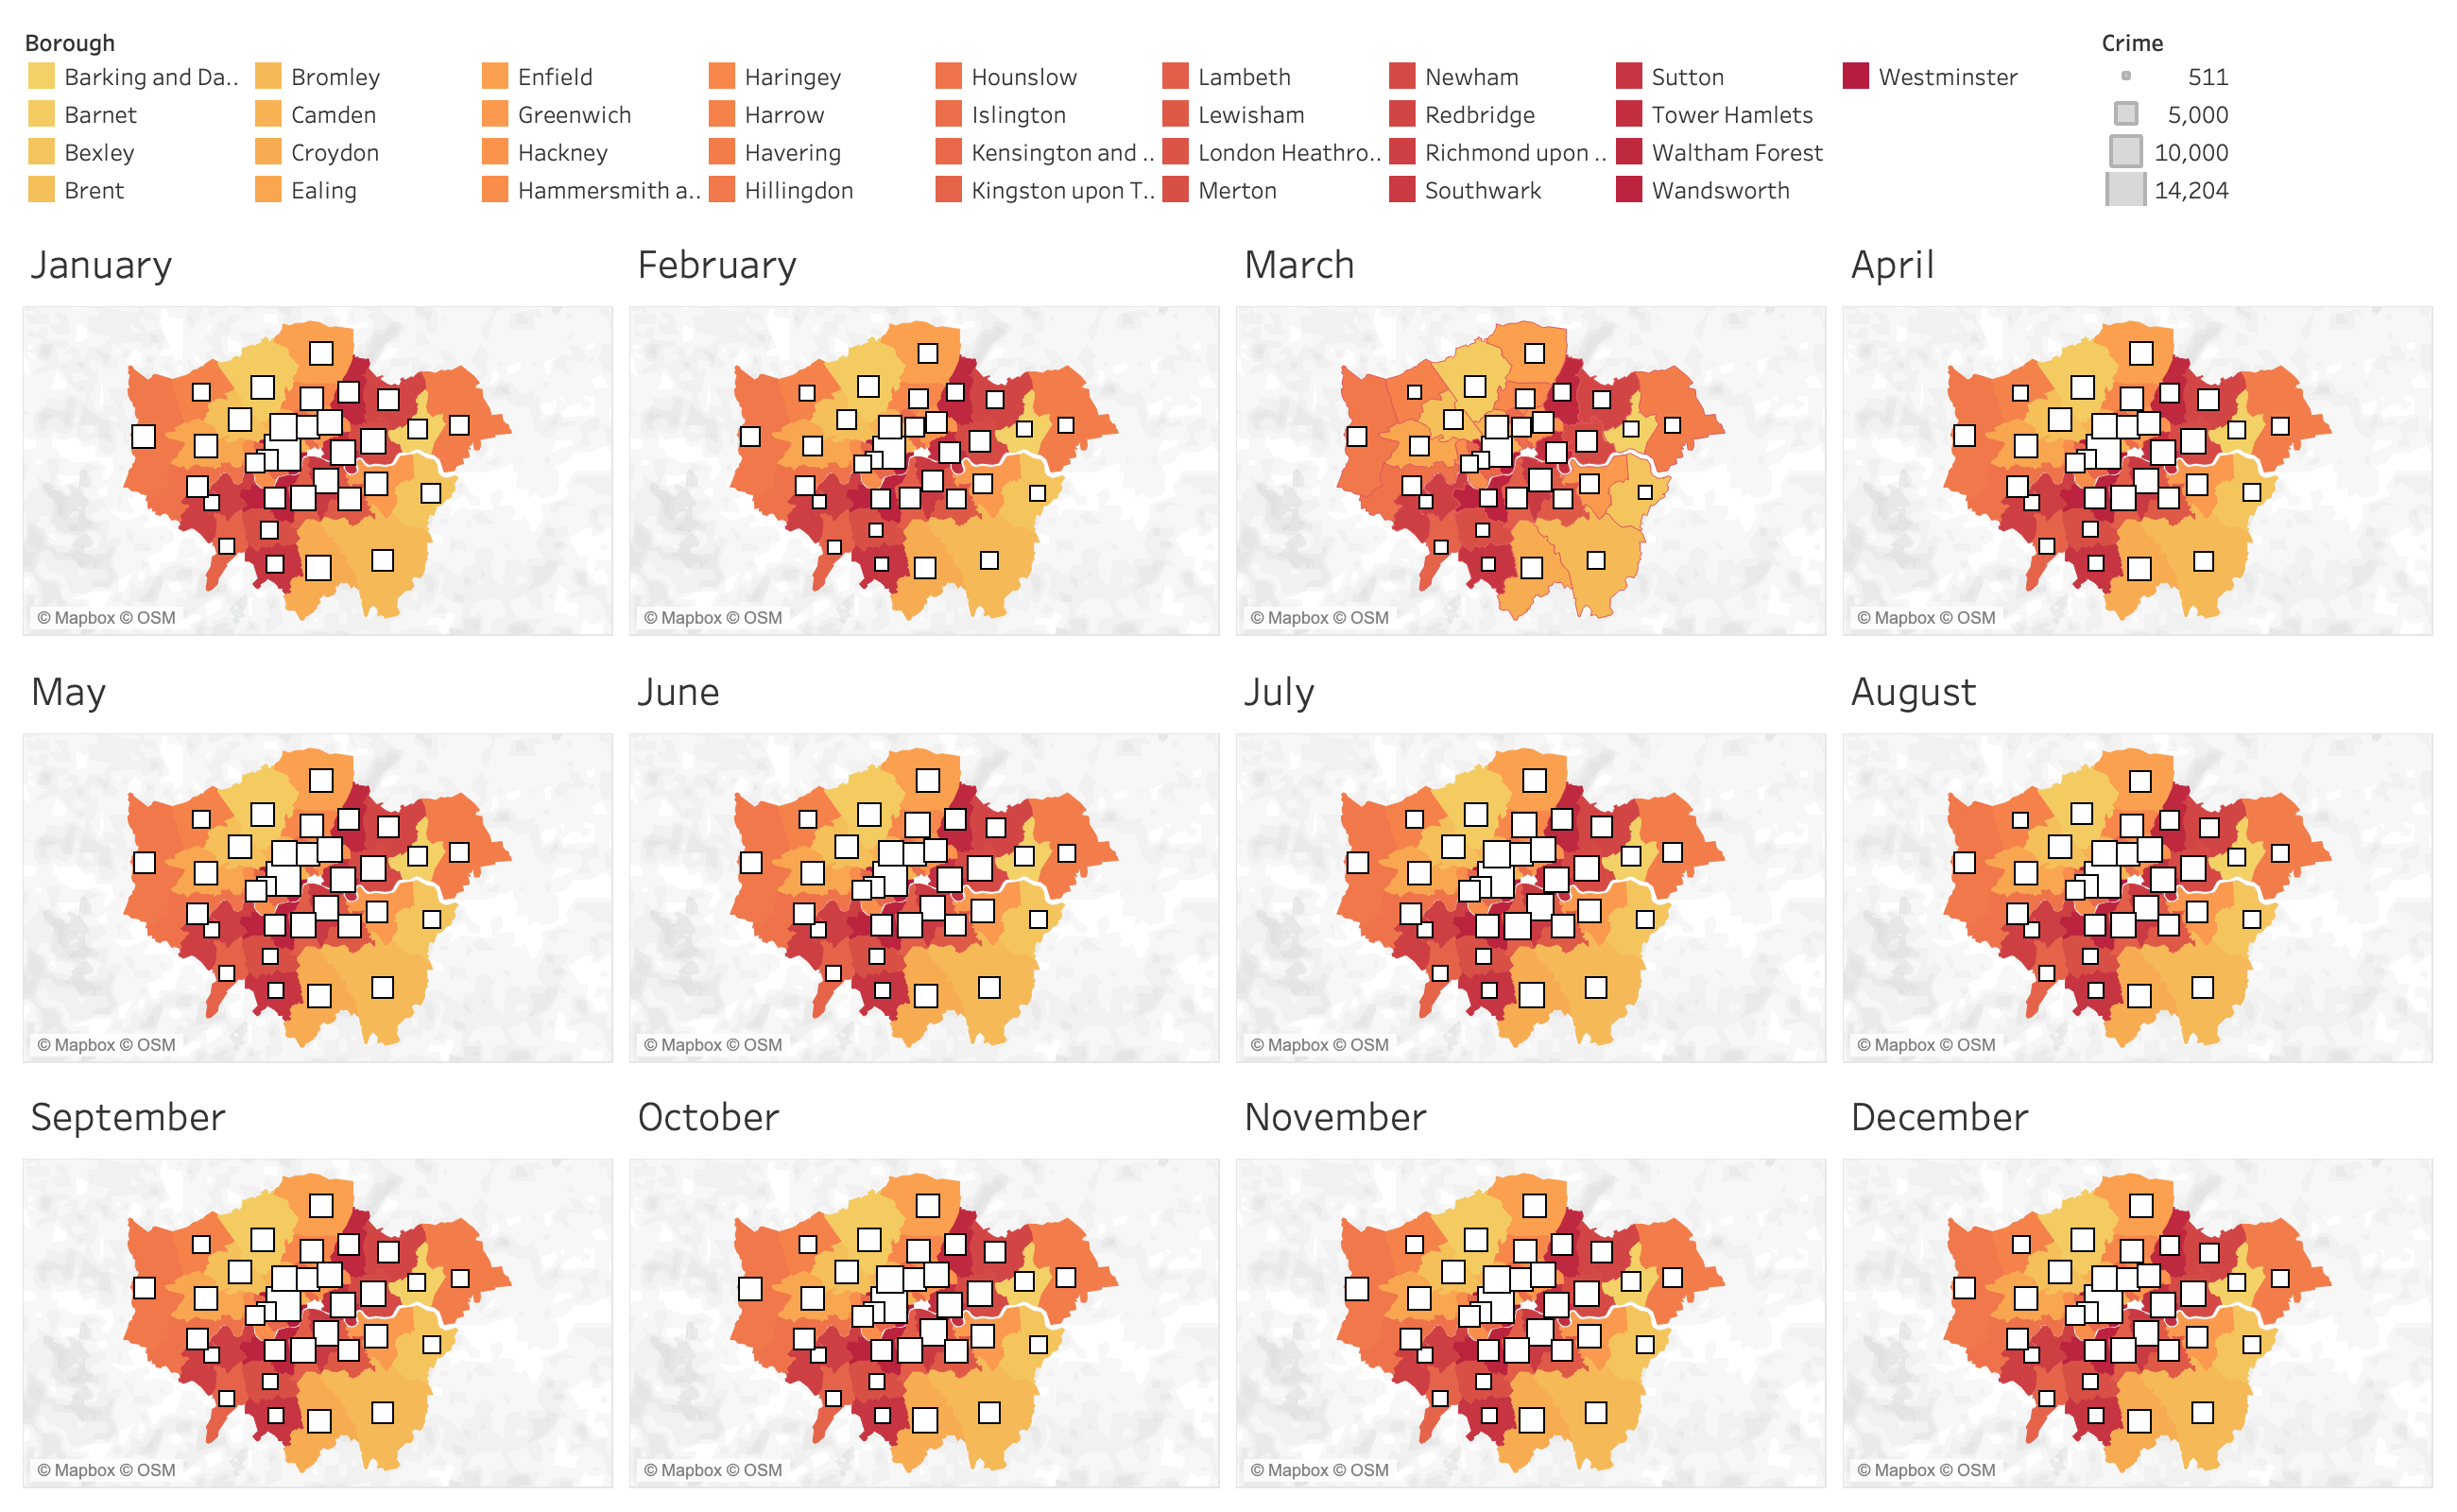

In [1]:
Image(filename='/Users/vithurshan/OneDrive - City, University of London/VisualAnalytics/Dashboard 3.2.png')

### Temperal variatons by type of crimes

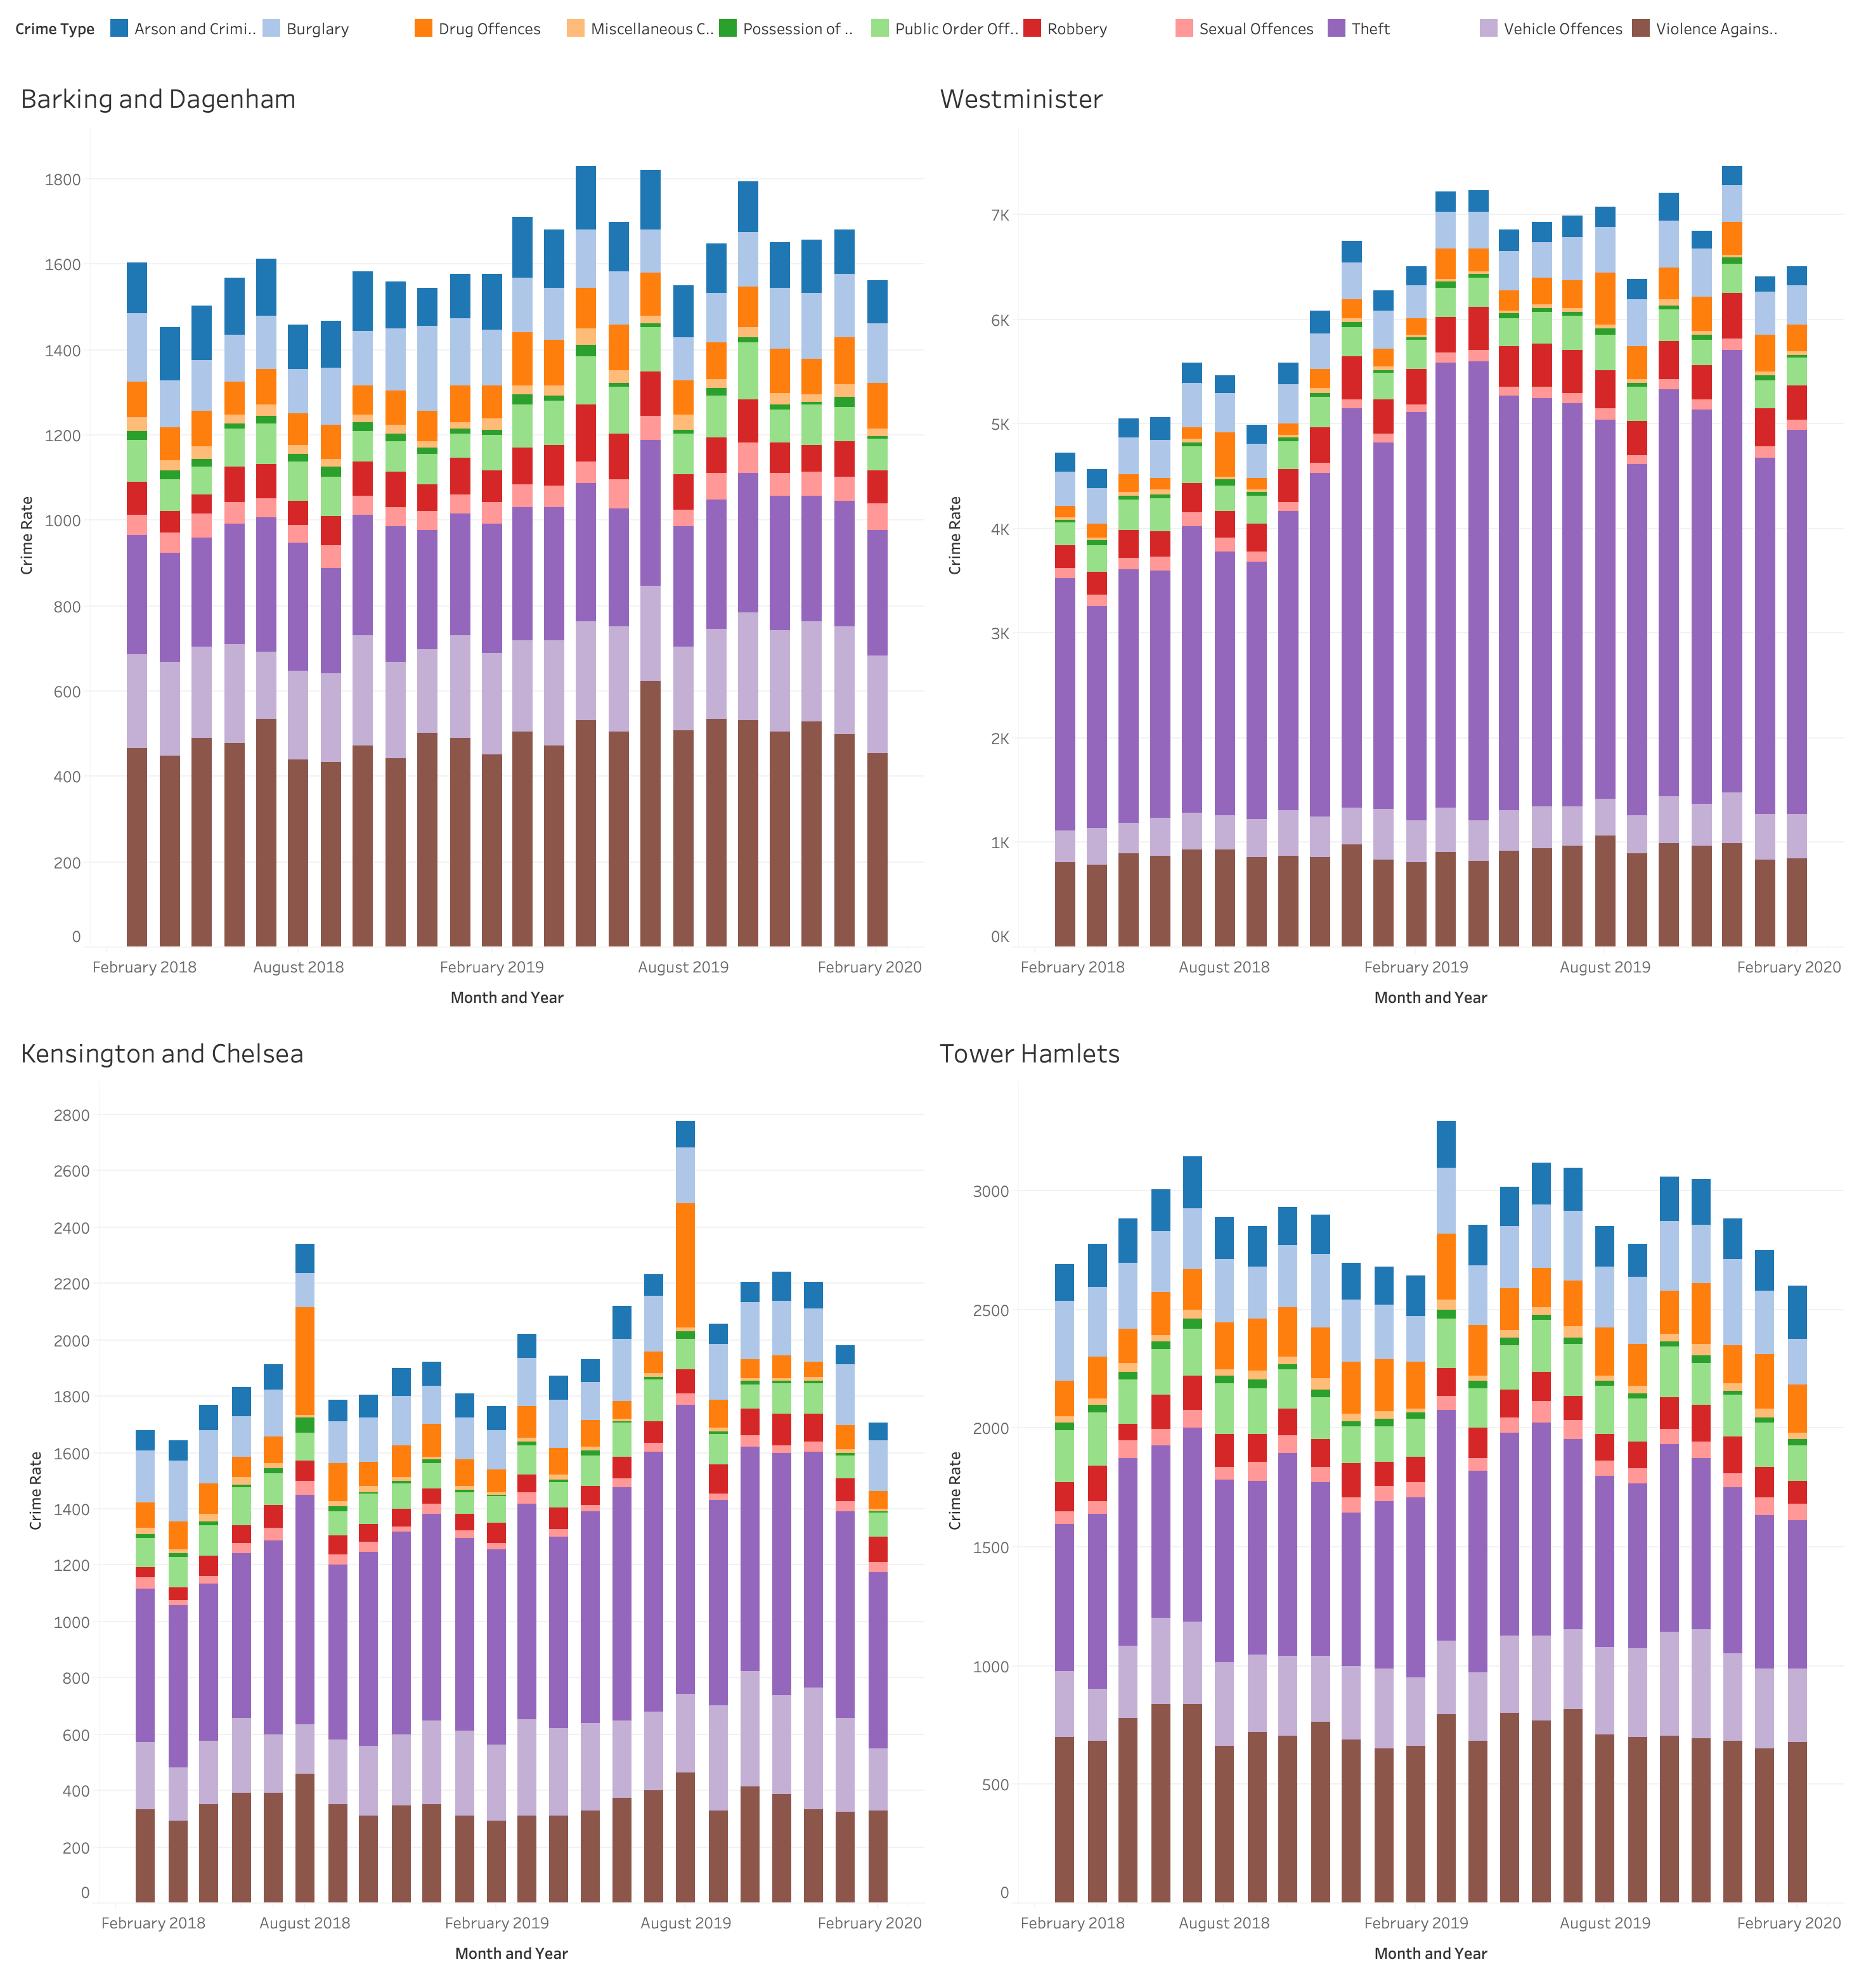

In [6]:
Image(filename='/Users/vithurshan/OneDrive - City, University of London/VisualAnalytics/Dashboard 6..3.png')

### Influence of youth on crime

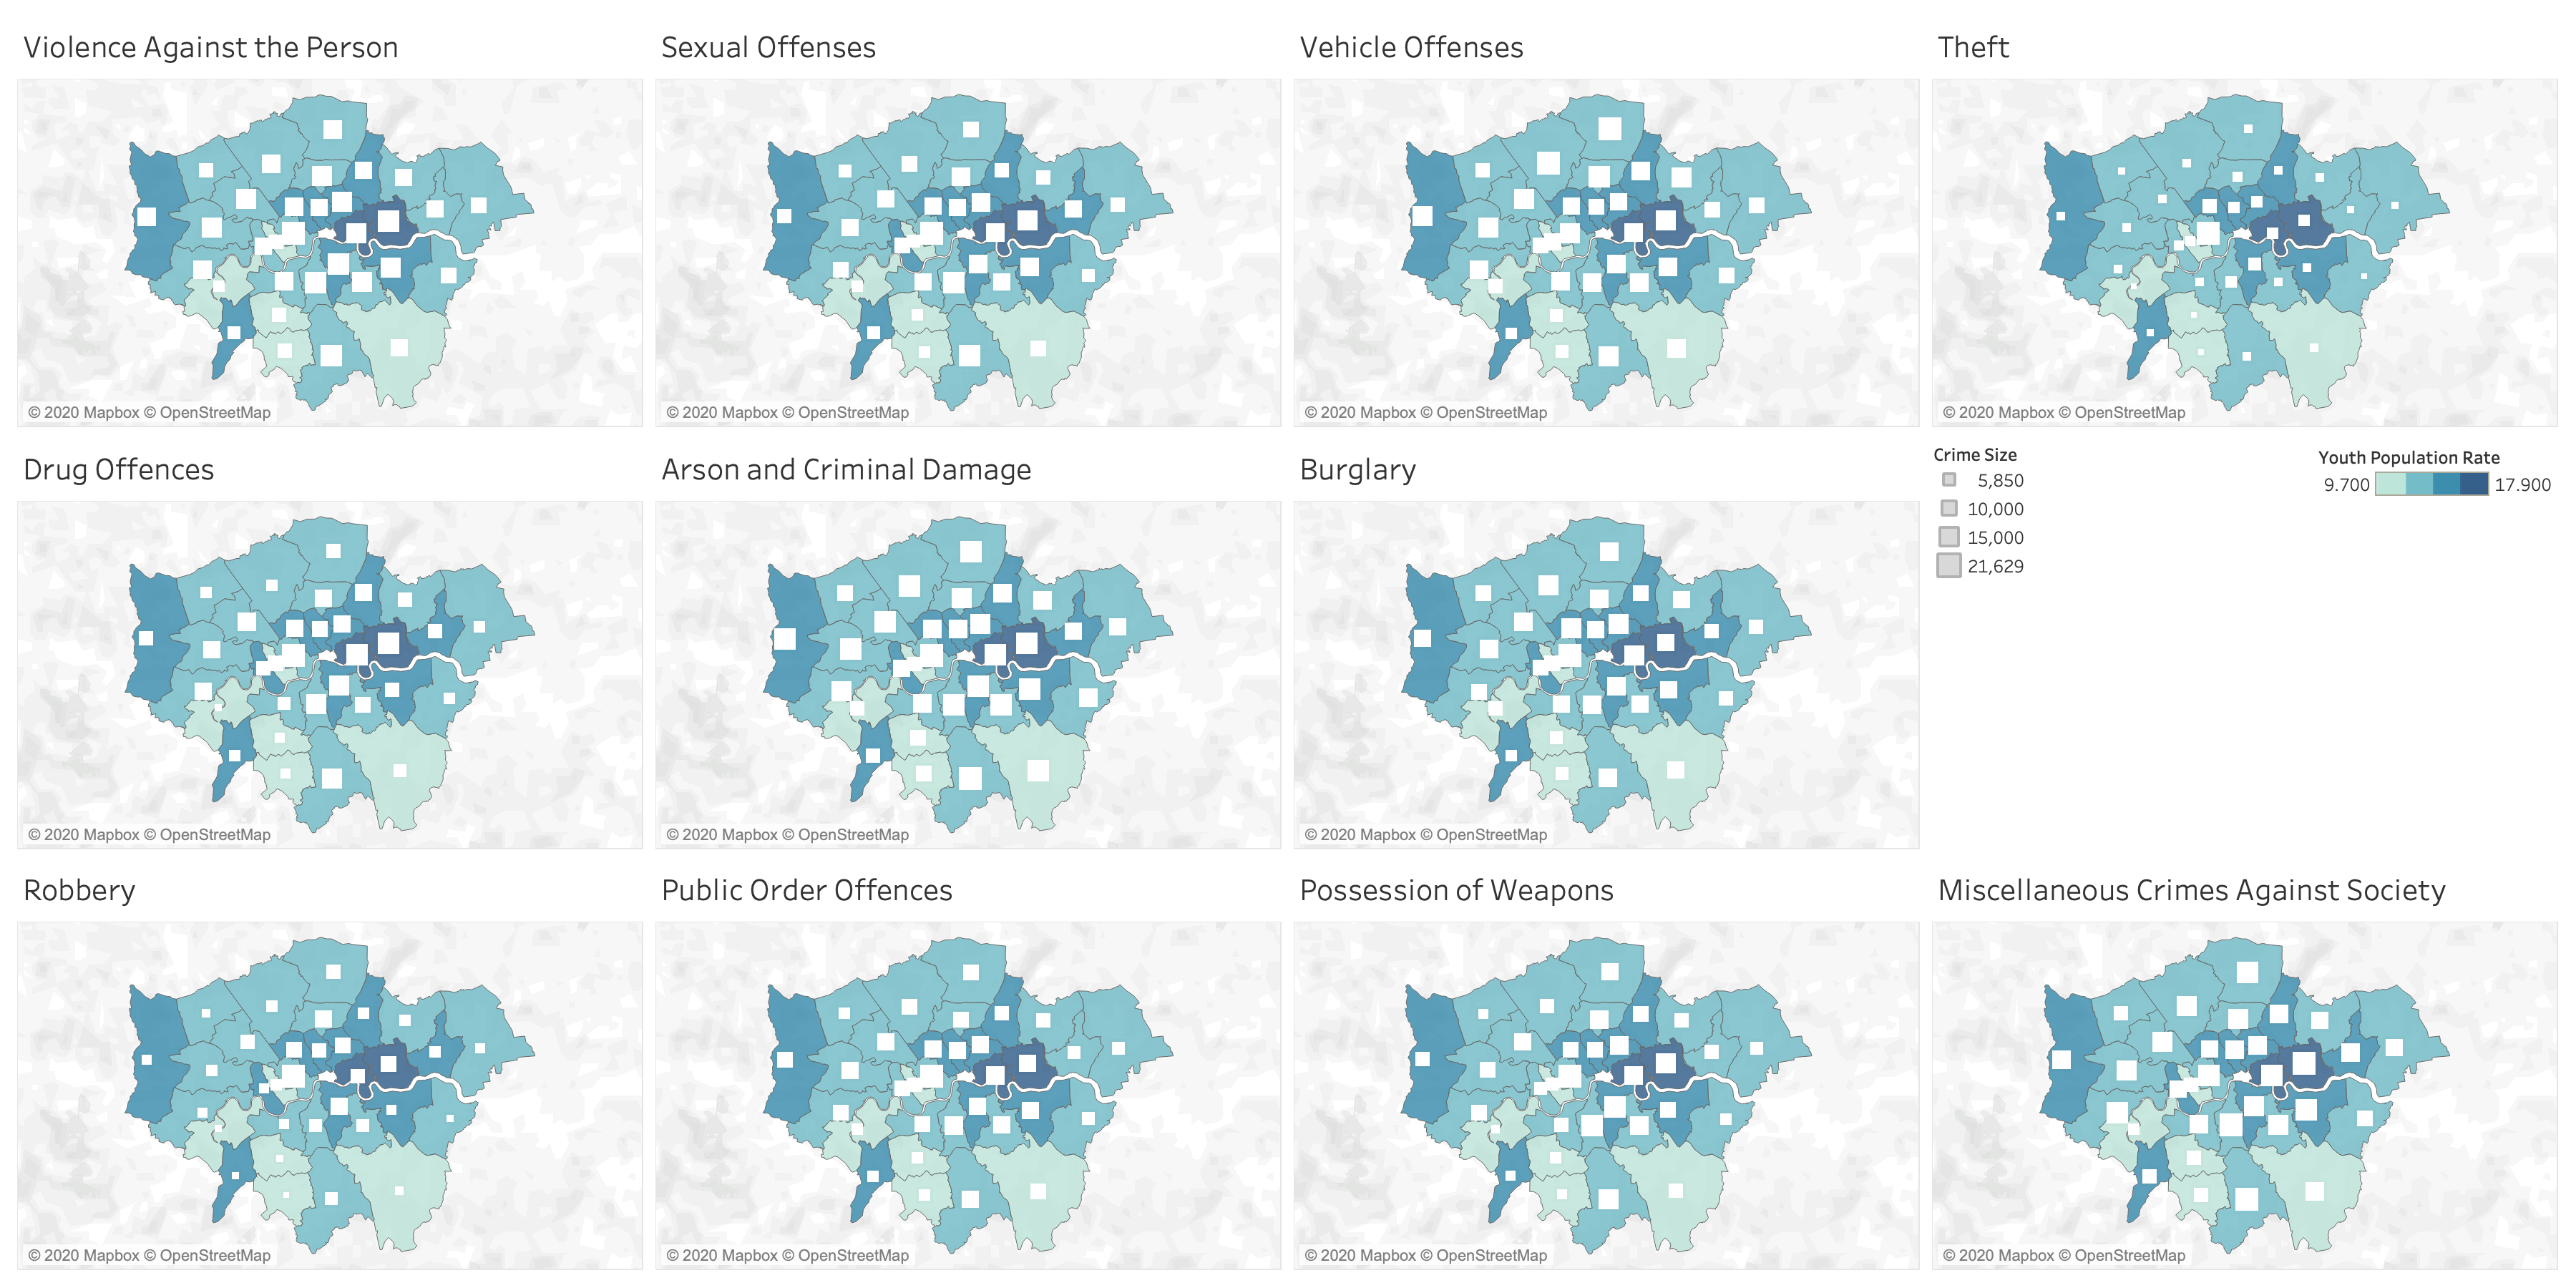

In [7]:
Image(filename='/Users/vithurshan/OneDrive - City, University of London/VisualAnalytics/Dashboard 8.1.png')

### Cluster of boroughs sharing similar relationships

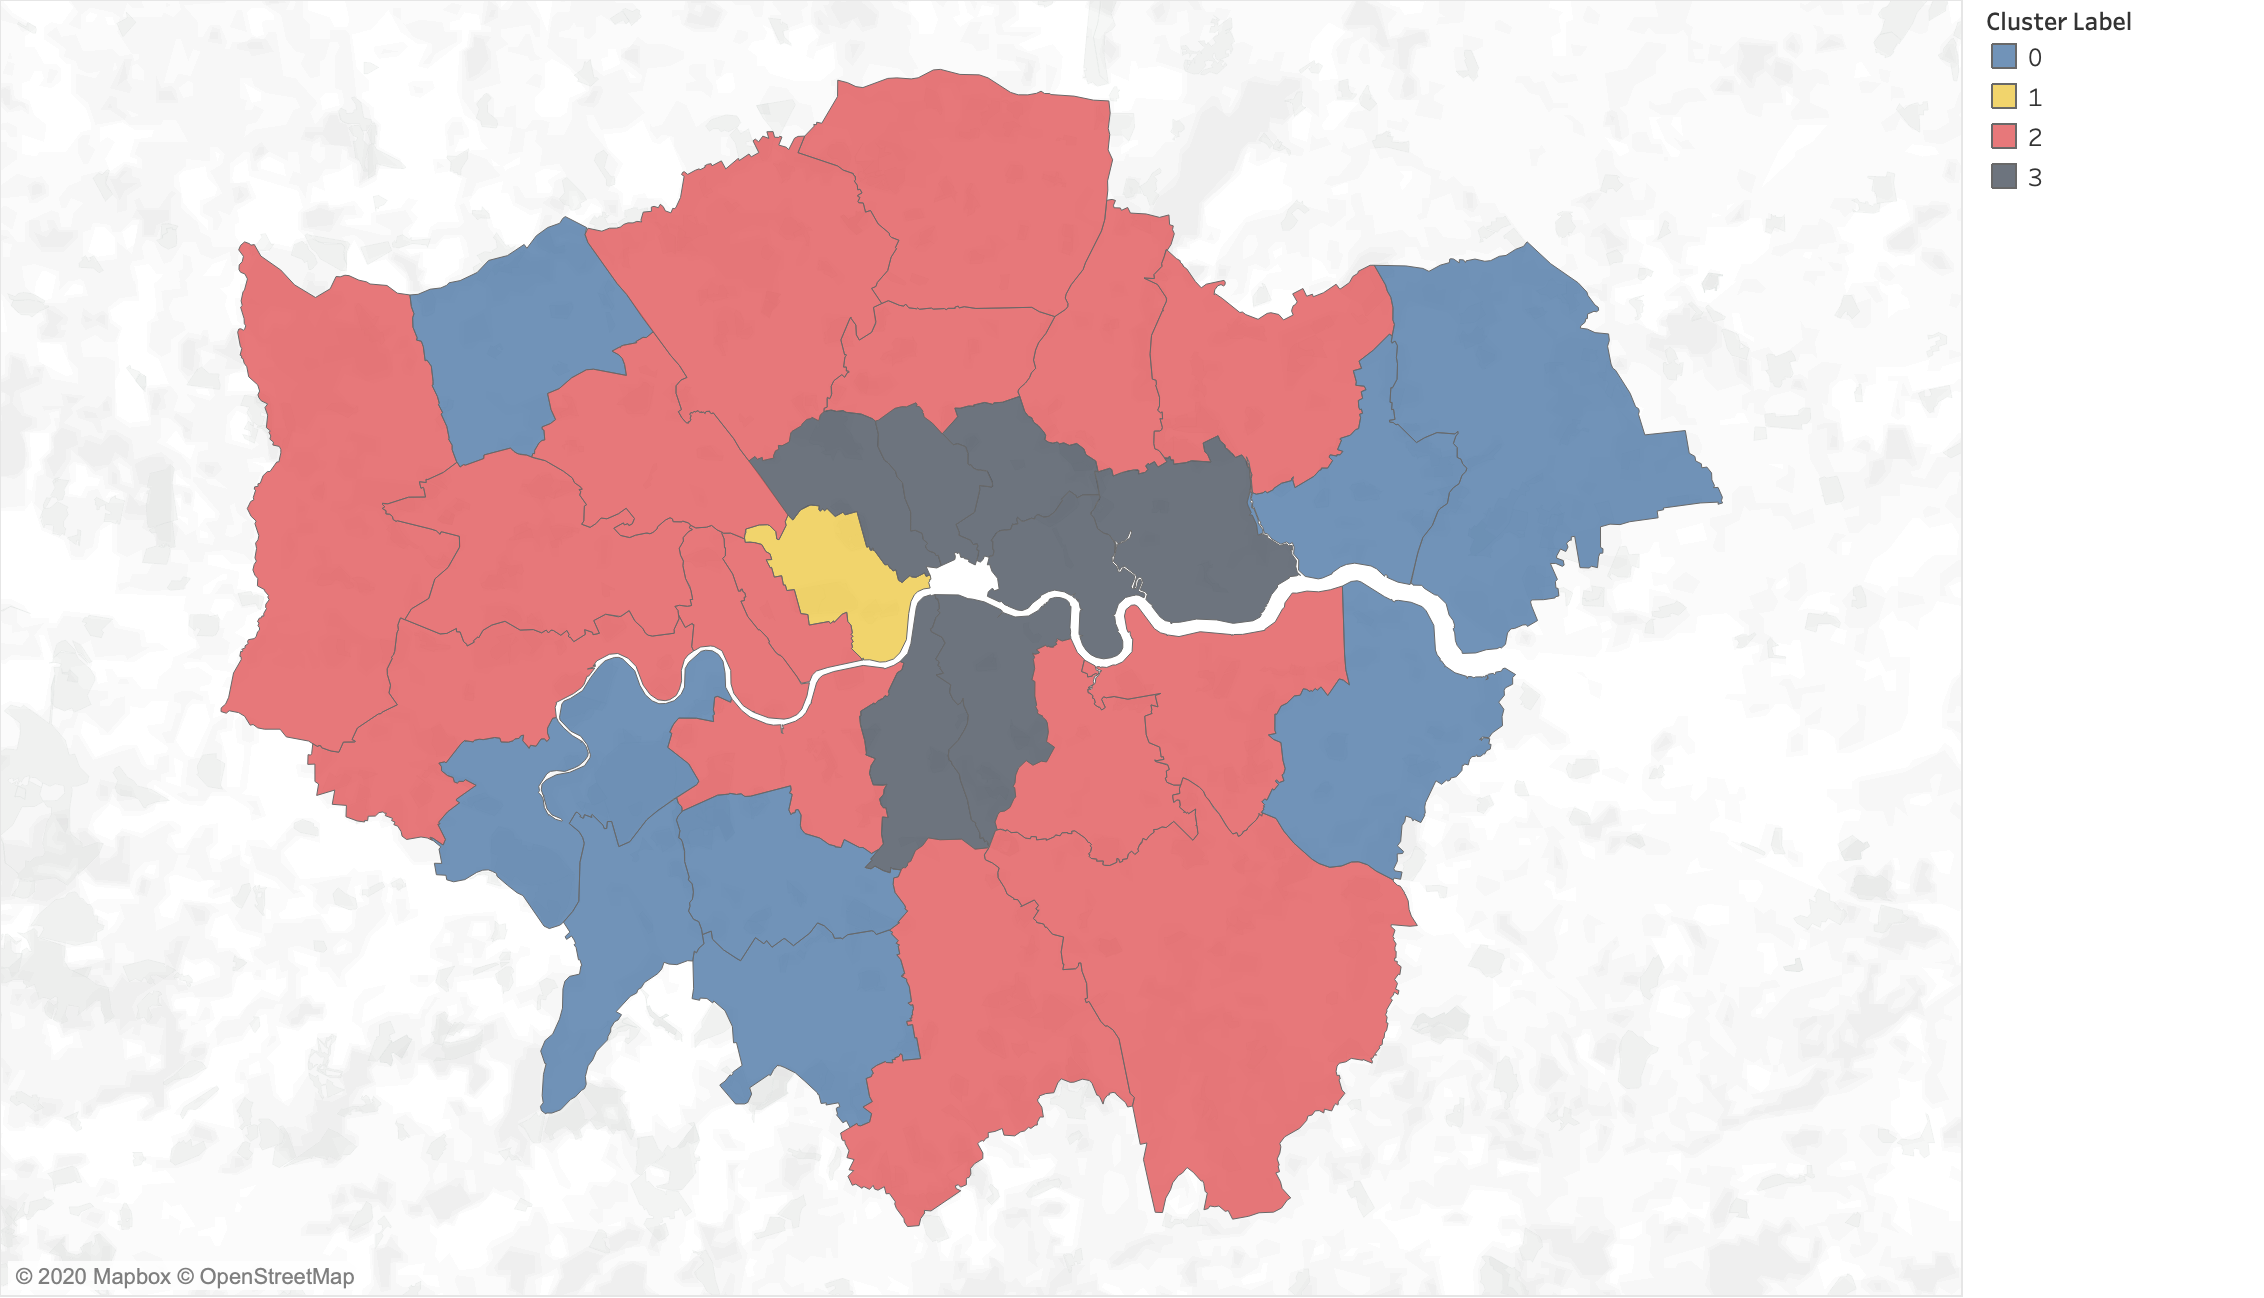

In [8]:
Image(filename='/Users/vithurshan/OneDrive - City, University of London/VisualAnalytics/Dashboard 9.4.png')

# Clustering by ward level.

In [112]:
ward_df = pd.read_csv('MPS Ward Level Crime (most recent 24 months).csv')
ward_df.head()

MajorText                          MinorText WardName  \
0  Arson and Criminal Damage                              Arson    Abbey   
1  Arson and Criminal Damage                    Criminal Damage    Abbey   
2                   Burglary  Burglary - Business and Community    Abbey   
3                   Burglary             Burglary - Residential    Abbey   
4              Drug Offences                   Drug Trafficking    Abbey   

    WardCode    LookUp_BoroughName  201803  201804  201805  201806  201807  \
0  E05000026  Barking and Dagenham       3       0       0       3       2   
1  E05000026  Barking and Dagenham      10      16      14      12      12   
2  E05000026  Barking and Dagenham       2       6       3       4       8   
3  E05000026  Barking and Dagenham       8       5       5       4       6   
4  E05000026  Barking and Dagenham       2       0       0       1       1   

   ...  201905  201906  201907  201908  201909  201910  201911  201912  \
0  ...       1       0       0       0       0       2       2       0   
1  ...       9      11      11      13      10      12       9      12   
2  ...       6       7       7      10       2       4      10       6   
3  ...       6       6       0       5       6       7      13       5   
4  ...       1       0       1       0       0       1       0       0   

   202001  202002  
0       0       0  
1       9      11  
2       4       3  
3       4       7  
4       0       0  

[5 rows x 29 columns]

In [113]:
#data transform
ward_df.drop(labels=['MinorText' ], axis='columns', inplace=True)

ward_df = ward_df.groupby(['LookUp_BoroughName','WardName','WardCode','MajorText'], as_index=False).agg('sum')
ward_df = ward_df.melt(id_vars =['LookUp_BoroughName','WardName','WardCode','MajorText'],var_name = 'MonthYear')

ward_df['Year'] = ward_df['MonthYear'].str[:4].astype(int)
ward_df['Month'] = ward_df['MonthYear'].str[4:].astype(int)

In [114]:
ward_df.head()

LookUp_BoroughName WardName   WardCode  \
0  Barking and Dagenham    Abbey  E05000026   
1  Barking and Dagenham    Abbey  E05000026   
2  Barking and Dagenham    Abbey  E05000026   
3  Barking and Dagenham    Abbey  E05000026   
4  Barking and Dagenham    Abbey  E05000026   

                              MajorText MonthYear  value  Year  Month  
0             Arson and Criminal Damage    201803     13  2018      3  
1                              Burglary    201803     10  2018      3  
2                         Drug Offences    201803     18  2018      3  
3  Miscellaneous Crimes Against Society    201803      3  2018      3  
4                 Possession of Weapons    201803      1  2018      3

In [115]:
ward_df_new = ward_df.groupby(['WardName','MajorText', 'WardCode'], as_index=False).agg('sum')

ward_df_new.drop(labels=['Year', 'Month'], axis='columns', inplace=True)

#pivot table by crime type
ward_df_new = ward_df_new.pivot_table(index=['WardName', 'WardCode'], columns='MajorText', values='value').reset_index()
ward_df_new.index.name = ward_df_new.columns.name = None

In [116]:
ward_df_new.head()

WardName   WardCode  Arson and Criminal Damage  Burglary  Drug Offences  \
0       Abbey  E05000026                        297       244            456   
1       Abbey  E05000455                        106       214             79   
2  Abbey Road  E05000630                         91       243             40   
3  Abbey Wood  E05000214                        310       272            183   
4    Abingdon  E05009388                        112       188             89   

   Miscellaneous Crimes Against Society  Possession of Weapons  \
0                                    57                     54   
1                                    22                     13   
2                                     8                     11   
3                                    47                     24   
4                                    13                     20   

   Public Order Offences  Robbery  Sexual Offences  Theft  Vehicle Offences  \
0                    296      378              135   1841               395   
1                    131       36               35    314               185   
2                     80      145               13    331               312   
3                    178       92               77    383               690   
4                    153       60               40    673               377   

   Violence Against the Person  
0                         1361  
1                          444  
2                          274  
3                          954  
4                          390

### Shapefile

In [117]:
gb = gpd.read_file("Wards_December_2019_Boundaries_UK_BFC.shp")
gb.head()

FID     WD19CD      WD19NM WD19NMW   BNG_E   BNG_N      LONG       LAT  \
0   11  E05000036  Mayesbrook    None  547124  185052  0.120332  51.54519   
1   12  E05000037    Parsloes    None  548150  185599  0.135348  51.54983   
2   13  E05000038       River    None  549432  182817  0.152645  51.52450   
3   14  E05000039      Thames    None  547155  182705  0.119800  51.52409   
4   15  E05000040     Valence    None  548153  186867  0.135925  51.56123   

     Shape__Are    Shape__Len  \
0  4.793606e+06  12266.291786   
1  3.212668e+06  10919.363634   
2  8.067167e+06  15751.880739   
3  1.722578e+07  21422.698113   
4  3.340691e+06   9308.345430   

                                            geometry  
0  POLYGON ((0.13193 51.54376, 0.13228 51.54348, ...  
1  POLYGON ((0.14282 51.55097, 0.14281 51.55095, ...  
2  POLYGON ((0.16601 51.52880, 0.16594 51.52865, ...  
3  POLYGON ((0.14780 51.53168, 0.14774 51.53160, ...  
4  POLYGON ((0.14787 51.56107, 0.14792 51.56090, ...

In [118]:
#longtitude and latitude join
gb.crs = {'init': 'epsg:27700'}
merged_df = pd.merge(ward_df_new,gb,left_on='WardCode', right_on='WD19CD', how='left')

In [119]:
merged_df.head()

WardName   WardCode  Arson and Criminal Damage  Burglary  Drug Offences  \
0       Abbey  E05000026                        297       244            456   
1       Abbey  E05000455                        106       214             79   
2  Abbey Road  E05000630                         91       243             40   
3  Abbey Wood  E05000214                        310       272            183   
4    Abingdon  E05009388                        112       188             89   

   Miscellaneous Crimes Against Society  Possession of Weapons  \
0                                    57                     54   
1                                    22                     13   
2                                     8                     11   
3                                    47                     24   
4                                    13                     20   

   Public Order Offences  Robbery  Sexual Offences  ...     WD19CD  \
0                    296      378              135  ...  E05000026   
1                    131       36               35  ...  E05000455   
2                     80      145               13  ...  E05000630   
3                    178       92               77  ...  E05000214   
4                    153       60               40  ...  E05009388   

       WD19NM  WD19NMW   BNG_E   BNG_N      LONG       LAT    Shape__Are  \
0       Abbey     None  544433  184379  0.081277  51.53983  3.243461e+06   
1       Abbey     None  525861  169831 -0.191540  51.41353  3.577863e+06   
2  Abbey Road     None  526334  183257 -0.179950  51.53409  2.826556e+06   
3  Abbey Wood     None  546816  178669  0.113238  51.48791  6.844678e+06   
4    Abingdon     None  525238  179040 -0.197240  51.49643  1.550934e+06   

     Shape__Len                                           geometry  
0  13060.533974  MULTIPOLYGON (((0.06918 51.54382, 0.06914 51.5...  
1   8602.821428  POLYGON ((-0.18134 51.41932, -0.18105 51.41782...  
2   7538.565018  POLYGON ((-0.16494 51.53578, -0.16543 51.53559...  
3  12644.877964  POLYGON ((0.12130 51.49110, 0.12131 51.49109, ...  
4   5787.054777  POLYGON ((-0.18948 51.49468, -0.18990 51.49470...  

[5 rows x 24 columns]

In [120]:
dropCol = ['FID', 'WD19CD', 'WD19NM', 'WD19NMW', 'BNG_E', 'BNG_E', 'Shape__Are', 'Shape__Len', 'geometry']
merged_df.drop(labels=dropCol, axis='columns', inplace=True)

In [121]:
#slect data
kmeans_cluster = merged_df.iloc[:,2:13]
print(merged_df.shape)
print(kmeans_cluster.shape)
kmeans_cluster.head()

(632, 16)
(632, 11)


Arson and Criminal Damage  Burglary  Drug Offences  \
0                        297       244            456   
1                        106       214             79   
2                         91       243             40   
3                        310       272            183   
4                        112       188             89   

   Miscellaneous Crimes Against Society  Possession of Weapons  \
0                                    57                     54   
1                                    22                     13   
2                                     8                     11   
3                                    47                     24   
4                                    13                     20   

   Public Order Offences  Robbery  Sexual Offences  Theft  Vehicle Offences  \
0                    296      378              135   1841               395   
1                    131       36               35    314               185   
2                     80      145               13    331               312   
3                    178       92               77    383               690   
4                    153       60               40    673               377   

   Violence Against the Person  
0                         1361  
1                          444  
2                          274  
3                          954  
4                          390

### Elbow method

In [69]:
elbow = []
for k in range(1,len(kmeans_cluster)):
    km = KMeans(n_clusters = k, random_state = 0).fit(kmeans_cluster)
    elbow.append(km.inertia_)

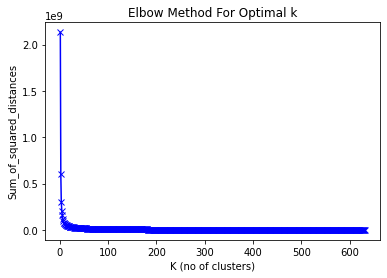

In [122]:
K = range(1,len(kmeans_cluster))
#plt.figure(figsize =(20,10))
plt.plot(K,  elbow,'bx-')
plt.xlabel('K (no of clusters)')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

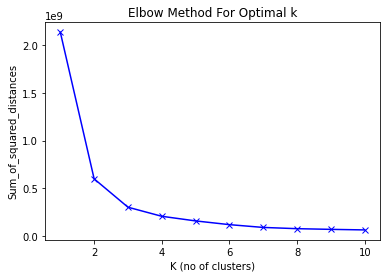

In [124]:
K = range(1,11)
#plt.figure(figsize =(20,10))
plt.plot(K,  elbow[0:10],'bx-')
plt.xlabel('K (no of clusters)')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette analysis

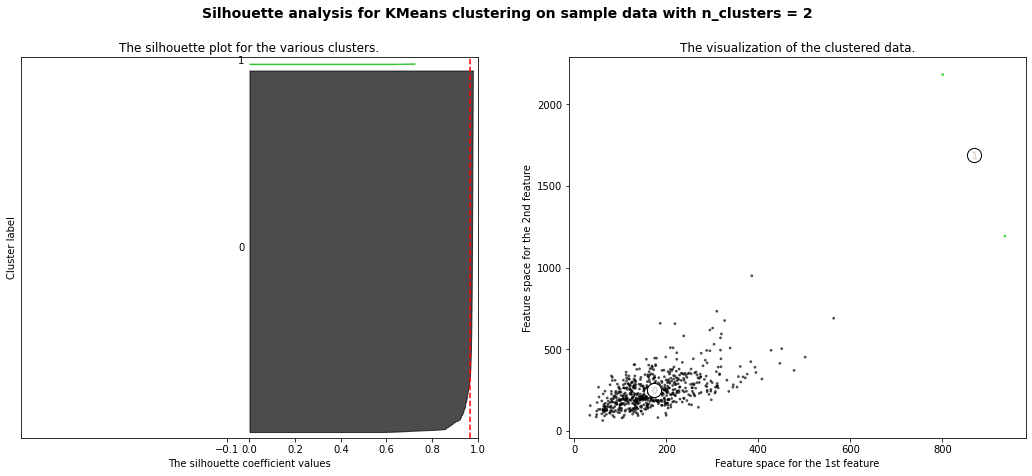

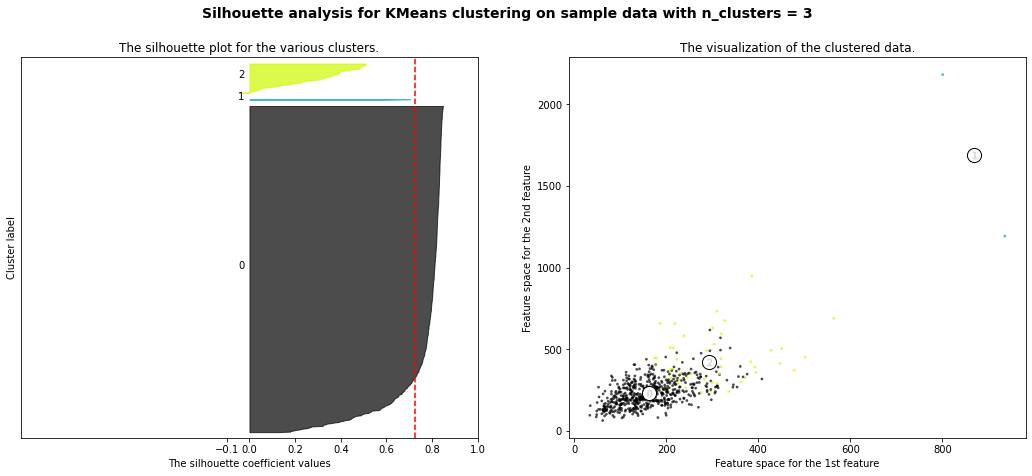

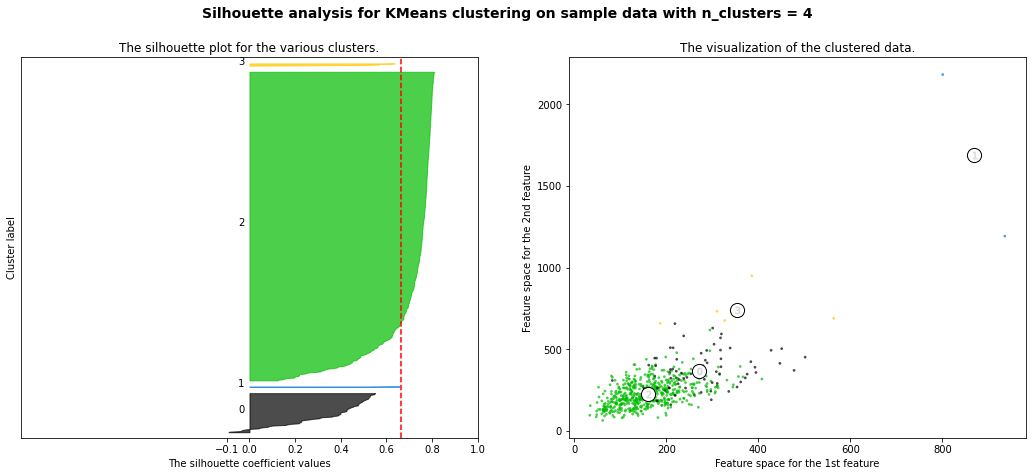

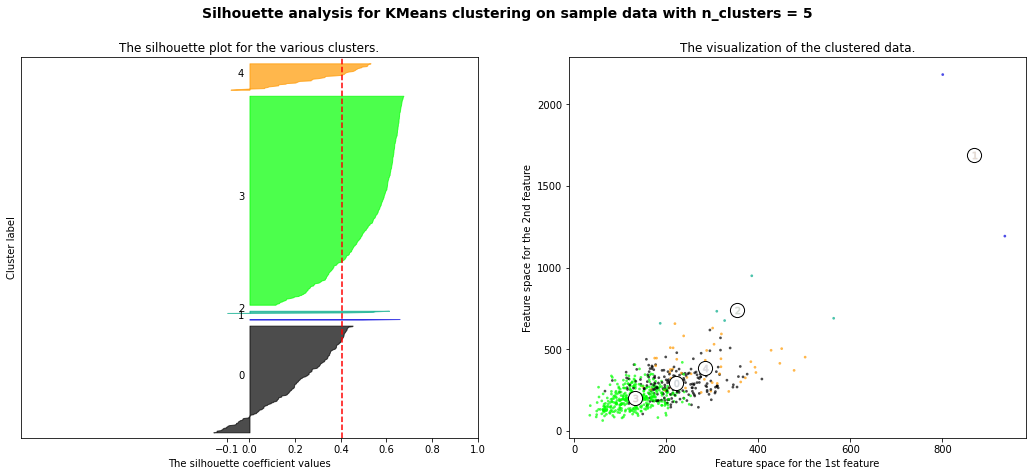

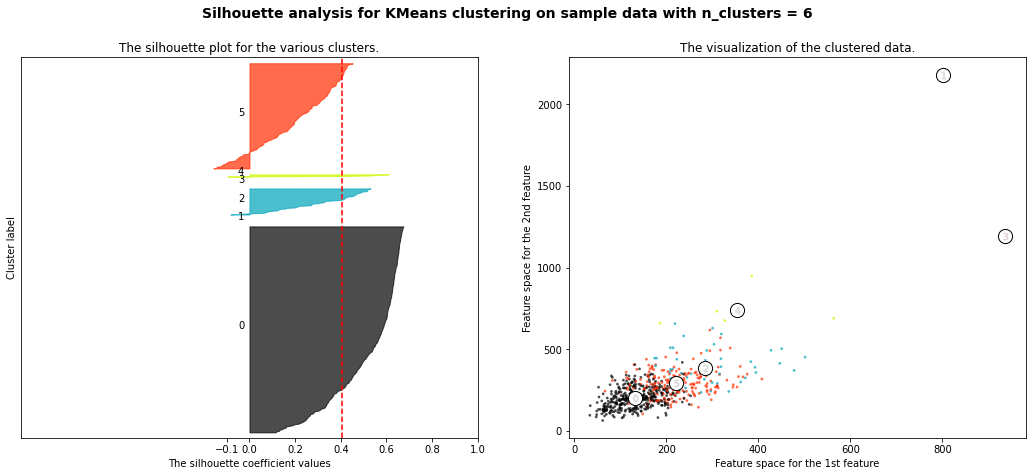

In [125]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# note this is pulled directly from scikit-learn help
def PlotSilhouette(X, range_n_clusters):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1
        ax1.set_xlim([-1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        #print("For n_clusters =", n_clusters,
        #      "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=0.1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    
# Plot silohouettes
inputComponents = kmeans_cluster.values
range_n_clusters = [2, 3, 4, 5, 6]
PlotSilhouette(inputComponents, range_n_clusters)

In [126]:
#kmeans with 3 clusters
cluster_num = 4
ldn_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(kmeans_cluster)

In [127]:
merged_df.insert(0,'Cluster_Labels', ldn_kmeans.labels_)
merged_df.head()

Cluster_Labels    WardName   WardCode  Arson and Criminal Damage  Burglary  \
0               3       Abbey  E05000026                        297       244   
1               0       Abbey  E05000455                        106       214   
2               0  Abbey Road  E05000630                         91       243   
3               0  Abbey Wood  E05000214                        310       272   
4               0    Abingdon  E05009388                        112       188   

   Drug Offences  Miscellaneous Crimes Against Society  Possession of Weapons  \
0            456                                    57                     54   
1             79                                    22                     13   
2             40                                     8                     11   
3            183                                    47                     24   
4             89                                    13                     20   

   Public Order Offences  Robbery  Sexual Offences  Theft  Vehicle Offences  \
0                    296      378              135   1841               395   
1                    131       36               35    314               185   
2                     80      145               13    331               312   
3                    178       92               77    383               690   
4                    153       60               40    673               377   

   Violence Against the Person   BNG_N      LONG       LAT  
0                         1361  184379  0.081277  51.53983  
1                          444  169831 -0.191540  51.41353  
2                          274  183257 -0.179950  51.53409  
3                          954  178669  0.113238  51.48791  
4                          390  179040 -0.197240  51.49643

In [128]:
def geocode_me(Location):
    try:
        return geolocator.geocode(Location)
    except GeocoderTimedOut:
        return geocode_me(Location)

In [129]:
#obtain latitude and longitude for London
geolocator = Nominatim(user_agent='UK_Explorer')
location1 = geocode_me('London, UK')
lon_lat = location1.latitude
lon_lng = location1.longitude

In [130]:
cluster_map = folium.Map(location = [lon_lat, lon_lng], zoom_start = 10)
for lat, lng, post, crime, cluster in zip(merged_df['LAT'], merged_df['LONG'], merged_df['WardCode'], merged_df['Theft'], merged_df['Cluster_Labels']):
    label = 'Cluster #: {} Postal Code: {} Crime: {} incidents'.format(cluster,post, crime)
    label = folium.Popup(label, parse_html = True)
    if cluster == 0:
        color="green" 
    elif cluster == 1:
        color = "white"
    elif cluster == 2:
        color = "blue"
    elif cluster == 3:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker([lat, lng], 
                        radius = 5,
                        blur=10,
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(cluster_map)
cluster_map

In [131]:
xmm=(merged_df.LAT.min() + merged_df.LAT.max())/2
ymm=(merged_df.LONG.min()+ merged_df.LONG.max())/2
hmap = folium.Map(location=[lon_lat, lon_lng],zoom_start=10)
hm_wide = HeatMap(list(zip(merged_df.LAT.values, merged_df.LONG.values)), 
                   min_opacity=0.2,
                   radius=7, blur=10, 
                   max_zoom=1, gradient={.6: 'blue', .9: 'orange', 1: 'red'}) 
hmap.add_child(hm_wide)